# **Big Data Mart Sales Problem**

Problem Statement:


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

## **1.Exploring the Data set** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df2=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [5]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **2.EDA**

Item_Type:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


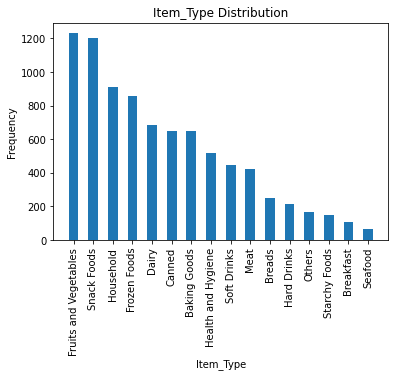

In [13]:
df1['Item_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Item_Type'].value_counts().index, df1['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Item_Type Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
print('Item_Type:\n',df1['Item_Type'].value_counts())

In [14]:

# Let's categorize 'Item_Type' into 'Non consumables', 'Drinks' and 'Foods' according to the 'Item_Identifier'
def item_identify(cols):
  item_id=cols[0]
  item_type=cols[1]
  
  if item_id[:2] == 'NC':
    return 'Non Consumables'
  elif item_id[:2] == 'DR':
    return 'Drinks'
  else:
    return 'Foods'

In [15]:
df1['Item_Type']=df1[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)
df2['Item_Type']=df2[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)

Item_Type:
 Foods              6125
Non Consumables    1599
Drinks              799
Name: Item_Type, dtype: int64


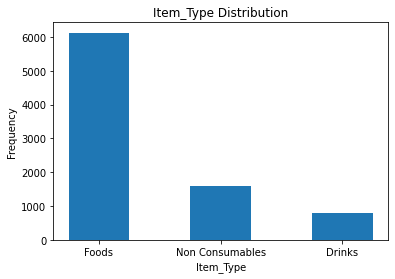

In [16]:

df1['Item_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Item_Type'].value_counts().index, df1['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Item_Type Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
print('Item_Type:\n',df1['Item_Type'].value_counts())

Item_Fat_Content:
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


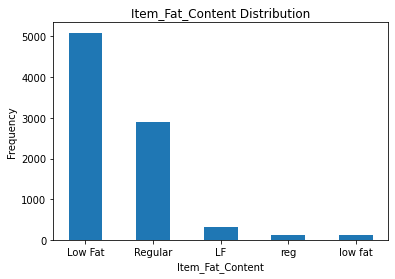

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Item_Fat_Content'].value_counts().index, df1['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Fat_Content:\n',df1['Item_Fat_Content'].value_counts())
#df1['Item_Fat_Content'].value_counts()

In [18]:
# From the above graph we can see that there are actually two classes in 'Item_Fat_Content'. But some of the items are non consumables.  
def item_fat(cols):
  fat=cols[0]
  typ=cols[1]
  
  if (fat=='Low Fat' or fat=='LF' or fat=='low fat') and (typ=='Foods' or typ=='Drinks'):
    return 'Low Fat'
  elif (fat=='Regular' or fat=='reg') and (typ=='Foods' or typ=='Drinks'):
    return 'Regular'
  else:
    return 'Non Edible'

In [19]:
df1['Item_Fat_Content']=df1[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)
df2['Item_Fat_Content']=df2[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)

Item_Fat_Content:
 Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64


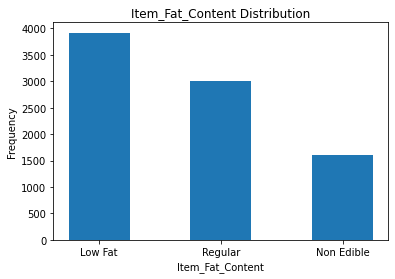

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Item_Fat_Content'].unique(), df1['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Fat_Content:\n',df1['Item_Fat_Content'].value_counts())

Text(0, 0.5, 'Frequency')

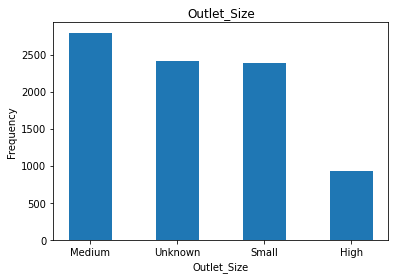

In [21]:
df1['Outlet_Size'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Outlet_Size'].value_counts().index, df1['Outlet_Size'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Outlet_Size')
#plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Size')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

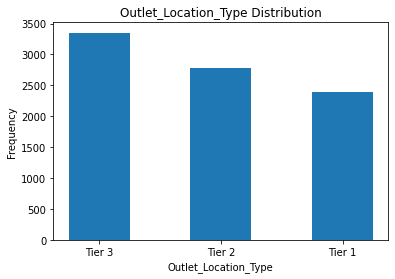

In [22]:

df1['Outlet_Location_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Outlet_Location_Type'].value_counts().index, df1['Outlet_Location_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Outlet_Location_Type Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

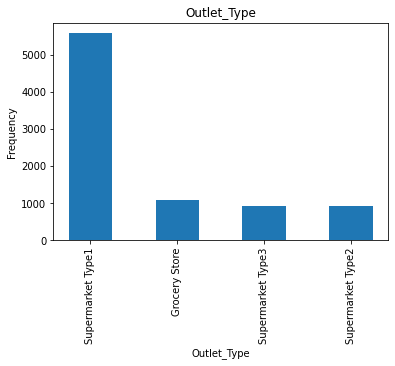

In [23]:
df1['Outlet_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Outlet_Type'].value_counts().index, df1['Outlet_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Outlet_Type')
plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Type')
plt.ylabel('Frequency')

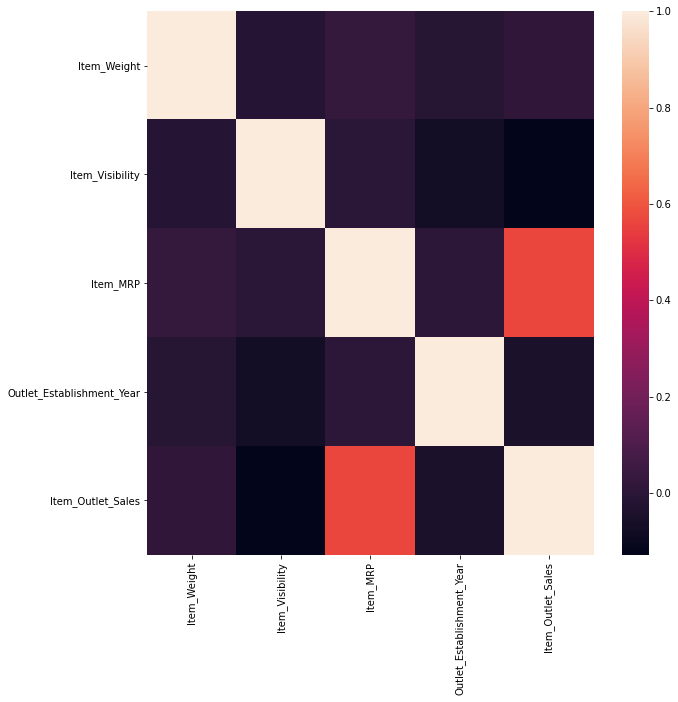

In [37]:
df_corr=df.corr()
plt.figure(figsize=[10,10])
sns.heatmap(df_corr)

## **3.Feature Engineering**

**Null value Removal**

In [38]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Years_of_Operation           0
dtype: int64

In [39]:
#Filling the Null values in 'Item_Weight' column with the average weight 
df1['Item_Weight'].fillna(value=df1['Item_Weight'].mean(),inplace=True)
df2['Item_Weight'].fillna(value=df2['Item_Weight'].mean(),inplace=True)

#Filling the Null values in 'Outlet_Size' column with "Unknown"
df1['Outlet_Size'].fillna(value='Unknown',inplace=True)
df2['Outlet_Size'].fillna(value='Unknown',inplace=True)

In [40]:
#Checking the Null values in Train set
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Years_of_Operation           0
dtype: int64

In [41]:
#Checking the Null values in Test set
df2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Years_of_Operation           0
dtype: int64

**Skewness and outlier**

In [45]:
df1.skew()

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Years_of_Operation           0.396641
dtype: float64

There is no high skewness present in data

### **Encoding**

In [ ]:
#Let's add a new feature that would have the number of years the outlet has been in operation till 2013. (This dataset is from 2013). 
def num_years(col):
  return 2013-col

In [ ]:
df1['Years_of_Operation']=df1['Outlet_Establishment_Year'].apply(num_years)
df2['Years_of_Operation']=df2['Outlet_Establishment_Year'].apply(num_years)

In [ ]:
# One hot encoding the categorical variables in both train and test set
item_fat_content=pd.get_dummies(df1['Item_Fat_Content'])
item_type=pd.get_dummies(df1['Item_Type'])
outlet_size=pd.get_dummies(df1['Outlet_Size'])
outlet_location_type=pd.get_dummies(df1['Outlet_Location_Type'])
output_type=pd.get_dummies(df1['Outlet_Type'])

item_fat_content_test=pd.get_dummies(df2['Item_Fat_Content'])
item_type_test=pd.get_dummies(df2['Item_Type'])
outlet_size_test=pd.get_dummies(df2['Outlet_Size'])
outlet_location_type_test=pd.get_dummies(df2['Outlet_Location_Type'])
output_type_test=pd.get_dummies(df2['Outlet_Type'])

## **Test Train Split**

In [46]:
train=df1
train=pd.concat([train,item_fat_content,item_type,outlet_size,outlet_location_type,output_type],axis=1)
train.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)
test=df2
test=pd.concat([test,item_fat_content_test,item_type_test,outlet_size_test,outlet_location_type_test,output_type_test],axis=1)
test.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)

In [47]:
df1['Item_Visibility'].value_counts().head(3)

0.066132    526
0.076975      3
0.096592      2
Name: Item_Visibility, dtype: int64

In [48]:
#The column 'Item_Visibility' has lots of 0 values. Let's fill this values with the mean value
df1['Item_Visibility'].mask(df1['Item_Visibility']== 0,df1['Item_Visibility'].mean(),inplace=True)
df2['Item_Visibility'].mask(df2['Item_Visibility']== 0,df2['Item_Visibility'].mean(),inplace=True)

In [49]:
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x_test=test

In [50]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

x_test=sc_x.fit_transform(x_test)

**LinearRegression**

In [51]:

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
predictions=lm.predict(x_val)

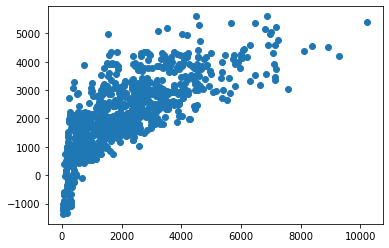

In [54]:
plt.scatter(y_val,predictions)

In [55]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions))

Mean Absolute Error:  805.162035610239
Mean Squared Error:  1179554.9133866576
Root Mean Squared Error:  1086.0731620782542
Explained Variance Score:  0.5781432334330647


**RandomForestRegressor**

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=76,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:

predictions1=rf.predict(x_val)

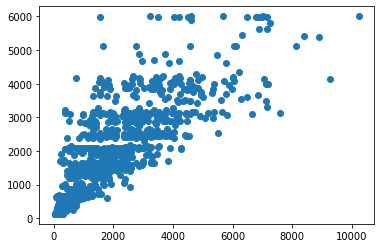

In [58]:
plt.scatter(y_val,predictions1)

In [59]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions1))

Mean Absolute Error:  721.8714647566972
Mean Squared Error:  1060318.7397627162
Root Mean Squared Error:  1029.7177961765622
Explained Variance Score:  0.6207550247904587


In [60]:
#Grid Search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    #'bootstrap': [True],
    #'max_depth': range(1,15,1),
    #'min_samples_leaf': range(70,80,1),
    #'min_samples_split': [8, 10, 12],
    'n_estimators': range(100,500,100)
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = 4, verbose = 2,scoring='neg_mean_absolute_error')
# Fit the grid search to the data
grid_search.fit(x, y)

grid_search.best_params_,grid_search.best_score_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  4.9min finished


({'n_estimators': 300}, -797.5019505621132)

In [61]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=41,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0,
                          subsample=0.75,
                          colsample_bytree=0.95,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.021,
                          seed=42,
                          )
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.95, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=41,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0.021, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.75, verbosity=1)

In [62]:
predictions2 = xg_reg.predict(x_val)

In [63]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions2))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions2))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions2)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions2))

Mean Absolute Error:  720.3817910920656
Mean Squared Error:  1059996.284783057
Root Mean Squared Error:  1029.561209828273
Explained Variance Score:  0.6210769021550897


In [64]:
from sklearn.model_selection import GridSearchCV
  
#Tune max_depth and min_child_weight
param_test1 = {
 'max_depth':range(2,4,1),
 'min_child_weight':range(3,6,1)
}
gsearch1 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test1, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch1.fit(x,y)
gsearch1.best_params_, gsearch1.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 3, 'min_child_weight': 5}, -755.5158996159646)

In [65]:
#Tuning Gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch2 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test2, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)

gsearch2.fit(x,y)
gsearch2.best_params_, gsearch2.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'gamma': 0.0}, -755.5158996159646)

In [66]:
#Tune subsample and colsample_bytree
param_test3 = {
 'subsample':[i/100.0 for i in range(75,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,100,5)]
}

gsearch3 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test3, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch3.fit(x,y)
gsearch3.best_params_, gsearch3.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'colsample_bytree': 0.95, 'subsample': 0.75}, -755.5158996159646)

In [67]:
# Tuning Regularization Parameters
param_test4 = {
 'reg_alpha':[0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.021,0.022,0.023,0.24,0.025,0.026]
}
gsearch4 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test4, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch4.fit(x,y)
gsearch4.best_params_, gsearch4.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'reg_alpha': 0.021}, -755.5158996159646)

In [68]:
# Tuning No. of trees
param_test5 = {
 'n_estimators':range(30,50,1)
}
gsearch5 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test5, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch5.fit(x,y)
gsearch5.best_params_, gsearch5.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'n_estimators': 41}, -755.5158996159646)

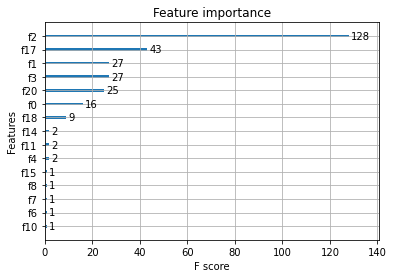

In [69]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [70]:
#Generating the Sales for the Test set and saving in a .csv file
pred_test = xg_reg.predict(x_test)
out_df = pd.DataFrame({'Item_Identifier':df2['Item_Identifier'].values,'Outlet_Identifier':df2['Outlet_Identifier'].values})
out_df['Item_Outlet_Sales'] = pred_test
out_df.to_csv('submission.csv', index=False)